# Group Assignment Pattern Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import VarianceThreshold
from scipy import stats

In [2]:
mnist = pd.read_csv('mnist.csv').values

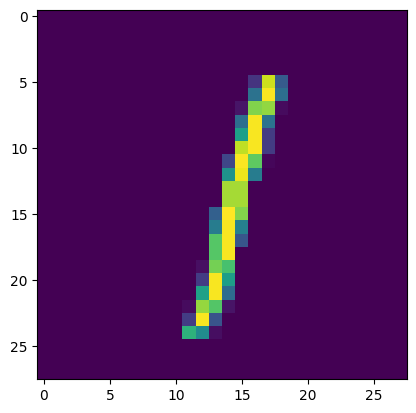

In [3]:
labels = mnist[:, 0]
digits = mnist[:, 1:]
img_size = 28
plt.imshow(digits[15].reshape(img_size, img_size))
plt.show()

## Task 1

In [4]:
# get descriptive statistics
df = pd.DataFrame(digits)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [5]:
# remove constant columns (i.e. pixels with no ink)
var_thr = VarianceThreshold(threshold = 0)
var_thr.fit(df)
concol = [column for column in df.columns 
          if column not in df.columns[var_thr.get_support()]]
df = df.drop(concol,axis=1) # 708 columns remaining
df.describe()

,12,13,14,15,32,33,34,35,36,37,...,770,771,772,773,774,775,776,777,778,779
count,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,...,42000.000000,42000.00000,42000.000000,42000.000000,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000
mean,0.00300,0.011190,0.005143,0.000214,0.000381,0.001310,0.010548,0.027262,0.050905,0.066405,...,0.677857,0.60281,0.489238,0.340214,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857
std,0.56812,1.626927,1.053972,0.043916,0.078072,0.232634,1.131661,2.310396,3.121847,3.259128,...,11.254931,10.69603,9.480066,7.950251,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,116.00000,254.000000,216.000000,9.000000,16.000000,47.000000,157.000000,254.000000,255.000000,243.000000,...,255.000000,255.00000,255.000000,255.000000,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000


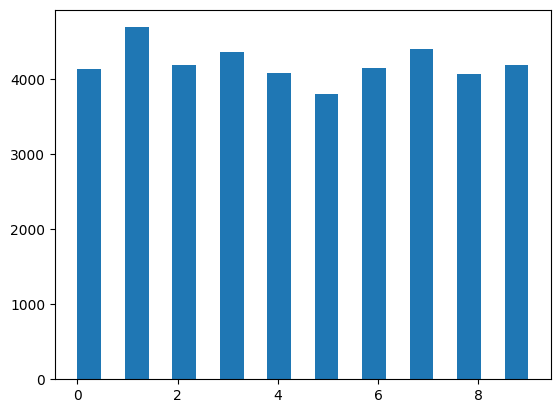

In [6]:
plt.hist(labels, bins=19)
plt.show()

In [7]:
# calculate the majority class
mode = stats.mode(labels)
print(mode[0]) # 1 is the majority class

[1]


/tmp/ipykernel_6744/1524035105.py:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = stats.mode(labels)


## Task 2

In [8]:
# calculate the ink per image
ink = np.array([sum(row) for row in digits])
# calculate the mean ink per digit class
ink_mean = [np.mean(ink[labels == i]) for i in range(10)]
# claclulate the std per digit class
ink_std = [np.std(ink[labels == i]) for i in range(10)]

In [9]:
labels_ink = np.column_stack((range(10), ink_mean, ink_std))
labels_ink[labels_ink[:, 1].argsort()]
# digit 0 and 1 will be the easiest to distinguish
# digit 4 and 9 as well as digit 2 and 8 and digit 3 and 6 will be especially hard to distinguish

array([[1.00000000e+00, 1.51884663e+04, 4.40946170e+03],
       [7.00000000e+00, 2.29312443e+04, 6.16834088e+03],
       [4.00000000e+00, 2.42327225e+04, 6.37463346e+03],
       [9.00000000e+00, 2.45537500e+04, 6.46523133e+03],
       [5.00000000e+00, 2.58359204e+04, 7.52660299e+03],
       [6.00000000e+00, 2.77349173e+04, 7.53050319e+03],
       [3.00000000e+00, 2.83201880e+04, 7.57410454e+03],
       [2.00000000e+00, 2.98710994e+04, 7.65300620e+03],
       [8.00000000e+00, 3.01841484e+04, 7.77739636e+03],
       [0.00000000e+00, 3.46324076e+04, 8.46189204e+03]])

In [10]:
# z-score standardize ink feature
from sklearn.preprocessing import scale
ink = scale(ink).reshape(-1, 1)

In [11]:
from sklearn.linear_model import LogisticRegression
mlr_ink = LogisticRegression(multi_class='multinomial', random_state=16).fit(ink, labels)

In [12]:
pred_labels = mlr_ink.predict(ink)
mlr_ink.score(ink, labels) # accuracy = 0.23

0.22680952380952382

## Task 3

In [13]:
import math
angle = np.zeros((len(digits), 1))

# calculate the angle of the first to the last non-zero pixel
for image in range(0, len(digits)):
    pixels = np.array(np.where(digits[image,:] > 0))
    first_pixel = pixels[:,0]
    last_pixel = pixels[:,-1]
    angle[image] = math.atan2(first_pixel,last_pixel) 

In [14]:
# calculate the mean angle per digit class
angle_mean = [np.mean(angle[labels == i]) for i in range(10)]
# claclulate the std per digit class
angle_std = [np.std(angle[labels == i]) for i in range(10)]

In [15]:
labels_angle = np.column_stack((range(10), angle_mean, angle_std))
labels_angle[labels_angle[:, 1].argsort()]
# digit 6 will be the easiest to distinguish
# digit 3 and 0 will be especially hard to distinguish

array([[6.        , 0.13480815, 0.02991747],
       [2.        , 0.18740269, 0.0502869 ],
       [1.        , 0.20070971, 0.01833319],
       [3.        , 0.20295307, 0.02845111],
       [0.        , 0.20633279, 0.03533058],
       [8.        , 0.21387058, 0.02416395],
       [4.        , 0.22139086, 0.02552286],
       [5.        , 0.23635413, 0.05788499],
       [9.        , 0.25286872, 0.01764282],
       [7.        , 0.26603898, 0.02351628]])

In [16]:
# z-score standardize ncomp feature
angle = scale(angle).reshape(-1, 1)

In [17]:
mlr_angle = LogisticRegression(multi_class='multinomial', random_state=16).fit(angle, labels)

In [18]:
pred_labels = mlr_angle.predict(angle)
mlr_angle.score(angle, labels) # accuracy = 0.34

0.3428809523809524

## Task 4

In [19]:
features = np.hstack((ink, angle))

In [20]:
mlr_both = LogisticRegression(multi_class='multinomial', random_state=16).fit(features, labels)

In [21]:
pred_labels = mlr_both.predict(features)
mlr_both.score(features, labels) # accuracy = 0.40

0.39804761904761904

## Task 5

In [22]:
#!pip install opencv-python

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
mnist_scaled = scaler.fit_transform(df[df.columns[1:]])
mnist_scaled.shape

(42000, 707)

In [24]:
mnist_scaled = np.column_stack((labels, mnist_scaled))
mnist_scaled.shape

(42000, 708)

In [25]:
index = np.random.choice(mnist_scaled.shape[0], 5000, replace=False)
sample = mnist_scaled[index]

In [26]:
sample_labels = sample[:, 0]
sample_digits = sample[:, 1:]

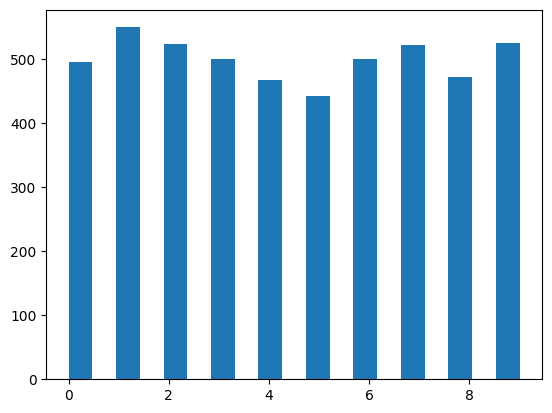

In [27]:
plt.hist(sample_labels, bins=19)
plt.show()

In [28]:
test_data = np.delete(mnist_scaled, index, axis=0)
test_labels = sample[:, 0]
test_digits = sample[:, 1:]

In [29]:
np.logspace(-3,3,7)

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [30]:
from sklearn.model_selection import GridSearchCV
param = {'C':np.logspace(-3,3,7), 'penalty':['l1'], 'solver':['saga']}
mlr = LogisticRegression(multi_class='multinomial', max_iter=10_000, random_state=16, verbose=1)
mlr_cv = GridSearchCV(mlr, param, cv=5, scoring='accuracy')
mlr_cv.fit(sample_digits, sample_labels)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


convergence after 7 epochs took 1 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

In [85]:
print("tuned hpyerparameters :(best parameters) ",mlr_cv.best_params_)
print("best score :",mlr_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}
best score : 0.8966000000000001


In [86]:
res = pd.DataFrame(mlr_cv.cv_results_)
res.iloc[:,res.columns.str.contains("split[0-9]_test_score|params",regex=True)]

,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score
0,"{'C': 0.001, 'penalty': 'l1', 'solver': 'saga'}",0.113,0.112,0.112,0.113,0.113
1,"{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}",0.803,0.838,0.808,0.824,0.830
2,"{'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}",0.878,0.891,0.893,0.889,0.903
3,"{'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}",0.887,0.891,0.901,0.892,0.906
4,"{'C': 10.0, 'penalty': 'l1', 'solver': 'saga'}",0.888,0.890,0.906,0.892,0.907
5,"{'C': 100.0, 'penalty': 'l1', 'solver': 'saga'}",0.888,0.890,0.906,0.892,0.907
6,"{'C': 1000.0, 'penalty': 'l1', 'solver': 'saga'}",0.888,0.890,0.906,0.892,0.907


In [32]:
mod = LogisticRegression(multi_class='multinomial', penalty='l1', C=10, solver='saga', random_state=16, n_jobs=-1, max_iter=10_000, verbose=1).fit(sample_digits, sample_labels)
pred = mod.predict(test_digits)
mod.score(test_digits, test_labels) # accuracy = 0.93

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.


Epoch 1, change: 1.00000000
Epoch 2, change: 8.86446099
Epoch 3, change: inf
Epoch 4, change: 1.00000000
Epoch 5, change: 1.00000000
Epoch 6, change: inf
Epoch 1, change: 1.00000000
Epoch 2, change: 12.30732164
Epoch 3, change: inf
Epoch 4, change: 1.00000000
Epoch 5, change: 1.00000000
Epoch 6, change: inf
Epoch 1, change: 1.00000000
Epoch 2, change: 0.30610715
Epoch 3, change: 0.18977588
Epoch 4, change: 0.13336451
Epoch 5, change: 0.10540030
Epoch 6, change: 0.08793971
Epoch 7, change: 0.07478285
Epoch 8, change: 0.06465019
Epoch 9, change: 0.05695813
Epoch 10, change: 0.05038603
Epoch 11, change: 0.04613642
Epoch 12, change: 0.04145384
Epoch 13, change: 0.03763213
Epoch 14, change: 0.03476128
Epoch 15, change: 0.03226478
Epoch 16, change: 0.02989231
Epoch 17, change: 0.02797075
Epoch 18, change: 0.02623693
Epoch 19, change: 0.02444515
Epoch 20, change: 0.02307718
Epoch 21, change: 0.02167174
Epoch 22, change: 0.02042601
Epoch 23, change: 0.01921583
Epoch 24, change: 0.01834445
Epoc

Epoch 403, change: 0.00124824
Epoch 404, change: 0.00124239
Epoch 405, change: 0.00124110
Epoch 406, change: 0.00123824
Epoch 407, change: 0.00123483
Epoch 408, change: 0.00123220
Epoch 409, change: 0.00122648
Epoch 410, change: 0.00122514
Epoch 411, change: 0.00122150
Epoch 412, change: 0.00121800
Epoch 413, change: 0.00121215
Epoch 414, change: 0.00120885
Epoch 415, change: 0.00121136
Epoch 416, change: 0.00120628
Epoch 417, change: 0.00120191
Epoch 418, change: 0.00119841
Epoch 419, change: 0.00119487
Epoch 420, change: 0.00119414
Epoch 421, change: 0.00118959
Epoch 422, change: 0.00118746
Epoch 423, change: 0.00118563
Epoch 424, change: 0.00118019
Epoch 425, change: 0.00117976
Epoch 426, change: 0.00117611
Epoch 427, change: 0.00116995
Epoch 428, change: 0.00117094
Epoch 429, change: 0.00116424
Epoch 430, change: 0.00116147
Epoch 431, change: 0.00116138
Epoch 432, change: 0.00115565
Epoch 433, change: 0.00115528
Epoch 434, change: 0.00114915
Epoch 435, change: 0.00114631
Epoch 436,

Epoch 676, change: 0.00069659
Epoch 677, change: 0.00069407
Epoch 678, change: 0.00069375
Epoch 679, change: 0.00069168
Epoch 680, change: 0.00069157
Epoch 681, change: 0.00069055
Epoch 682, change: 0.00068895
Epoch 683, change: 0.00068804
Epoch 684, change: 0.00068617
Epoch 685, change: 0.00068526
Epoch 686, change: 0.00068461
Epoch 687, change: 0.00068238
Epoch 688, change: 0.00068142
Epoch 689, change: 0.00068062
Epoch 690, change: 0.00067998
Epoch 691, change: 0.00067803
Epoch 692, change: 0.00067732
Epoch 693, change: 0.00067688
Epoch 694, change: 0.00067510
Epoch 695, change: 0.00067406
Epoch 696, change: 0.00067277
Epoch 697, change: 0.00067160
Epoch 698, change: 0.00067161
Epoch 699, change: 0.00066991
Epoch 700, change: 0.00066952
Epoch 701, change: 0.00066660
Epoch 702, change: 0.00066561
Epoch 703, change: 0.00066442
Epoch 704, change: 0.00066370
Epoch 705, change: 0.00066173
Epoch 706, change: 0.00066084
Epoch 707, change: 0.00066025
Epoch 708, change: 0.00065874
Epoch 709,

Epoch 950, change: 0.00045419
Epoch 951, change: 0.00045334
Epoch 952, change: 0.00045258
Epoch 953, change: 0.00045235
Epoch 954, change: 0.00045156
Epoch 955, change: 0.00045097
Epoch 956, change: 0.00045034
Epoch 957, change: 0.00045003
Epoch 958, change: 0.00044899
Epoch 959, change: 0.00044857
Epoch 960, change: 0.00044756
Epoch 961, change: 0.00044729
Epoch 962, change: 0.00044696
Epoch 963, change: 0.00044553
Epoch 964, change: 0.00044569
Epoch 965, change: 0.00044465
Epoch 966, change: 0.00044417
Epoch 967, change: 0.00044379
Epoch 968, change: 0.00044321
Epoch 969, change: 0.00044299
Epoch 970, change: 0.00044102
Epoch 971, change: 0.00044077
Epoch 972, change: 0.00044000
Epoch 973, change: 0.00044025
Epoch 974, change: 0.00043875
Epoch 975, change: 0.00043854
Epoch 976, change: 0.00043831
Epoch 977, change: 0.00043714
Epoch 978, change: 0.00043675
Epoch 979, change: 0.00043603
Epoch 980, change: 0.00043531
Epoch 981, change: 0.00043476
Epoch 982, change: 0.00043497
Epoch 983,

Epoch 1215, change: 0.00032145
Epoch 1216, change: 0.00032040
Epoch 1217, change: 0.00032065
Epoch 1218, change: 0.00032021
Epoch 1219, change: 0.00031915
Epoch 1220, change: 0.00031907
Epoch 1221, change: 0.00031872
Epoch 1222, change: 0.00031828
Epoch 1223, change: 0.00031826
Epoch 1224, change: 0.00031748
Epoch 1225, change: 0.00031711
Epoch 1226, change: 0.00031706
Epoch 1227, change: 0.00031664
Epoch 1228, change: 0.00031664
Epoch 1229, change: 0.00031661
Epoch 1230, change: 0.00031524
Epoch 1231, change: 0.00031482
Epoch 1232, change: 0.00031448
Epoch 1233, change: 0.00031502
Epoch 1234, change: 0.00031350
Epoch 1235, change: 0.00031366
Epoch 1236, change: 0.00031357
Epoch 1237, change: 0.00031228
Epoch 1238, change: 0.00031226
Epoch 1239, change: 0.00031212
Epoch 1240, change: 0.00031162
Epoch 1241, change: 0.00031087
Epoch 1242, change: 0.00031119
Epoch 1243, change: 0.00031010
Epoch 1244, change: 0.00031000
Epoch 1245, change: 0.00030969
Epoch 1246, change: 0.00030992
Epoch 12

Epoch 1480, change: 0.00023897
Epoch 1481, change: 0.00023860
Epoch 1482, change: 0.00023839
Epoch 1483, change: 0.00023829
Epoch 1484, change: 0.00023837
Epoch 1485, change: 0.00023828
Epoch 1486, change: 0.00023695
Epoch 1487, change: 0.00023713
Epoch 1488, change: 0.00023709
Epoch 1489, change: 0.00023708
Epoch 1490, change: 0.00023709
Epoch 1491, change: 0.00023637
Epoch 1492, change: 0.00023563
Epoch 1493, change: 0.00023539
Epoch 1494, change: 0.00023559
Epoch 1495, change: 0.00023514
Epoch 1496, change: 0.00023510
Epoch 1497, change: 0.00023454
Epoch 1498, change: 0.00023457
Epoch 1499, change: 0.00023407
Epoch 1500, change: 0.00023390
Epoch 1501, change: 0.00023370
Epoch 1502, change: 0.00023378
Epoch 1503, change: 0.00023312
Epoch 1504, change: 0.00023284
Epoch 1505, change: 0.00023307
Epoch 1506, change: 0.00023249
Epoch 1507, change: 0.00023237
Epoch 1508, change: 0.00023151
Epoch 1509, change: 0.00023188
Epoch 1510, change: 0.00023168
Epoch 1511, change: 0.00023152
Epoch 15

Epoch 1744, change: 0.00019334
Epoch 1745, change: 0.00019309
Epoch 1746, change: 0.00019291
Epoch 1747, change: 0.00019286
Epoch 1748, change: 0.00019291
Epoch 1749, change: 0.00019270
Epoch 1750, change: 0.00019267
Epoch 1751, change: 0.00019274
Epoch 1752, change: 0.00019266
Epoch 1753, change: 0.00019255
Epoch 1754, change: 0.00019249
Epoch 1755, change: 0.00019219
Epoch 1756, change: 0.00019219
Epoch 1757, change: 0.00019213
Epoch 1758, change: 0.00019205
Epoch 1759, change: 0.00019198
Epoch 1760, change: 0.00019180
Epoch 1761, change: 0.00019176
Epoch 1762, change: 0.00019174
Epoch 1763, change: 0.00019157
Epoch 1764, change: 0.00019154
Epoch 1765, change: 0.00019145
Epoch 1766, change: 0.00019145
Epoch 1767, change: 0.00019132
Epoch 1768, change: 0.00019143
Epoch 1769, change: 0.00019126
Epoch 1770, change: 0.00019138
Epoch 1771, change: 0.00019096
Epoch 1772, change: 0.00019103
Epoch 1773, change: 0.00019075
Epoch 1774, change: 0.00019086
Epoch 1775, change: 0.00019076
Epoch 17

Epoch 2008, change: 0.00017188
Epoch 2009, change: 0.00017169
Epoch 2010, change: 0.00017174
Epoch 2011, change: 0.00017141
Epoch 2012, change: 0.00017133
Epoch 2013, change: 0.00017145
Epoch 2014, change: 0.00017134
Epoch 2015, change: 0.00017103
Epoch 2016, change: 0.00017111
Epoch 2017, change: 0.00017081
Epoch 2018, change: 0.00017070
Epoch 2019, change: 0.00017094
Epoch 2020, change: 0.00017062
Epoch 2021, change: 0.00017060
Epoch 2022, change: 0.00017060
Epoch 2023, change: 0.00017047
Epoch 2024, change: 0.00017048
Epoch 2025, change: 0.00017034
Epoch 2026, change: 0.00017030
Epoch 2027, change: 0.00017023
Epoch 2028, change: 0.00017026
Epoch 2029, change: 0.00016957
Epoch 2030, change: 0.00016995
Epoch 2031, change: 0.00016982
Epoch 2032, change: 0.00016968
Epoch 2033, change: 0.00016970
Epoch 2034, change: 0.00016962
Epoch 2035, change: 0.00016954
Epoch 2036, change: 0.00016918
Epoch 2037, change: 0.00016922
Epoch 2038, change: 0.00016939
Epoch 2039, change: 0.00016925
Epoch 20

Epoch 2272, change: 0.00014965
Epoch 2273, change: 0.00014924
Epoch 2274, change: 0.00014943
Epoch 2275, change: 0.00014923
Epoch 2276, change: 0.00014922
Epoch 2277, change: 0.00014911
Epoch 2278, change: 0.00014911
Epoch 2279, change: 0.00014882
Epoch 2280, change: 0.00014889
Epoch 2281, change: 0.00014875
Epoch 2282, change: 0.00014854
Epoch 2283, change: 0.00014851
Epoch 2284, change: 0.00014849
Epoch 2285, change: 0.00014836
Epoch 2286, change: 0.00014840
Epoch 2287, change: 0.00014801
Epoch 2288, change: 0.00014818
Epoch 2289, change: 0.00014803
Epoch 2290, change: 0.00014808
Epoch 2291, change: 0.00014782
Epoch 2292, change: 0.00014786
Epoch 2293, change: 0.00014760
Epoch 2294, change: 0.00014772
Epoch 2295, change: 0.00014743
Epoch 2296, change: 0.00014739
Epoch 2297, change: 0.00014732
Epoch 2298, change: 0.00014728
Epoch 2299, change: 0.00014711
Epoch 2300, change: 0.00014699
Epoch 2301, change: 0.00014697
Epoch 2302, change: 0.00014696
Epoch 2303, change: 0.00014676
Epoch 23

Epoch 2537, change: 0.00013422
Epoch 2538, change: 0.00013419
Epoch 2539, change: 0.00013391
Epoch 2540, change: 0.00013406
Epoch 2541, change: 0.00013405
Epoch 2542, change: 0.00013407
Epoch 2543, change: 0.00013399
Epoch 2544, change: 0.00013408
Epoch 2545, change: 0.00013359
Epoch 2546, change: 0.00013380
Epoch 2547, change: 0.00013373
Epoch 2548, change: 0.00013368
Epoch 2549, change: 0.00013358
Epoch 2550, change: 0.00013368
Epoch 2551, change: 0.00013359
Epoch 2552, change: 0.00013369
Epoch 2553, change: 0.00013344
Epoch 2554, change: 0.00013344
Epoch 2555, change: 0.00013348
Epoch 2556, change: 0.00013328
Epoch 2557, change: 0.00013325
Epoch 2558, change: 0.00013318
Epoch 2559, change: 0.00013320
Epoch 2560, change: 0.00013323
Epoch 2561, change: 0.00013310
Epoch 2562, change: 0.00013316
Epoch 2563, change: 0.00013312
Epoch 2564, change: 0.00013305
Epoch 2565, change: 0.00013309
Epoch 2566, change: 0.00013303
Epoch 2567, change: 0.00013289
Epoch 2568, change: 0.00013287
Epoch 25

Epoch 2801, change: 0.00012317
Epoch 2802, change: 0.00012316
Epoch 2803, change: 0.00012315
Epoch 2804, change: 0.00012318
Epoch 2805, change: 0.00012300
Epoch 2806, change: 0.00012312
Epoch 2807, change: 0.00012308
Epoch 2808, change: 0.00012316
Epoch 2809, change: 0.00012284
Epoch 2810, change: 0.00012286
Epoch 2811, change: 0.00012280
Epoch 2812, change: 0.00012278
Epoch 2813, change: 0.00012262
Epoch 2814, change: 0.00012268
Epoch 2815, change: 0.00012262
Epoch 2816, change: 0.00012258
Epoch 2817, change: 0.00012250
Epoch 2818, change: 0.00012248
Epoch 2819, change: 0.00012241
Epoch 2820, change: 0.00012233
Epoch 2821, change: 0.00012239
Epoch 2822, change: 0.00012237
Epoch 2823, change: 0.00012227
Epoch 2824, change: 0.00012227
Epoch 2825, change: 0.00012216
Epoch 2826, change: 0.00012222
Epoch 2827, change: 0.00012225
Epoch 2828, change: 0.00012217
Epoch 2829, change: 0.00012221
Epoch 2830, change: 0.00012177
Epoch 2831, change: 0.00012198
Epoch 2832, change: 0.00012185
Epoch 28

Epoch 3065, change: 0.00011149
Epoch 3066, change: 0.00011153
Epoch 3067, change: 0.00011152
Epoch 3068, change: 0.00011138
Epoch 3069, change: 0.00011141
Epoch 3070, change: 0.00011144
Epoch 3071, change: 0.00011129
Epoch 3072, change: 0.00011132
Epoch 3073, change: 0.00011115
Epoch 3074, change: 0.00011126
Epoch 3075, change: 0.00011109
Epoch 3076, change: 0.00011110
Epoch 3077, change: 0.00011103
Epoch 3078, change: 0.00011099
Epoch 3079, change: 0.00011100
Epoch 3080, change: 0.00011087
Epoch 3081, change: 0.00011090
Epoch 3082, change: 0.00011077
Epoch 3083, change: 0.00011081
Epoch 3084, change: 0.00011081
Epoch 3085, change: 0.00011083
Epoch 3086, change: 0.00011056
Epoch 3087, change: 0.00011073
Epoch 3088, change: 0.00011074
Epoch 3089, change: 0.00011076
Epoch 3090, change: 0.00011037
Epoch 3091, change: 0.00011054
Epoch 3092, change: 0.00011031
Epoch 3093, change: 0.00011031
Epoch 3094, change: 0.00011043
Epoch 3095, change: 0.00011025
Epoch 3096, change: 0.00011019
Epoch 30

Epoch 3329, change: 0.00010020convergence after 3336 epochs took 1695 seconds


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed: 28.3min finished


0.9966

In [33]:
import pickle

In [39]:
with open("logreg_converged.pickle", "wb") as f:
    pickle.dump(mod, f)

In [44]:
with open("logreg_converged.pickle", "rb") as f:
    loaded = pickle.load(f)
    
mod.score(test_digits, test_labels) * 100

99.66000000000001